# Physics 77/88 - Fall 2024 - Homework 6 
## Random Numbers II 
*Submit this notebook to bCourses to receive a credit for this assignment.*
<br>
due: **Oct 30th 2024** 
<br>
**Please upload both, the .ipynb file and the corresponding .pdf**
<br>
## Problem 1 (25P)

Write a new script **random_machine_Boltzmann.py** based on **random_machine.py** from the previous week, but this time make sure that the **total(!) number of pips/states on the dice stays constant** throughout the simulation!<br>
You can achive that by rolling a randomly choosen die (as before), calculate the difference $d$ between its new state and its current state, for example $d= +3$, and then substract $1$ from three randomly choosen dice. If $d$ is negative, the values have to be added. Make sure, that no die has a state less than $1$.<br>
Hint: the plots should now look similar to the plots shown below:<br>

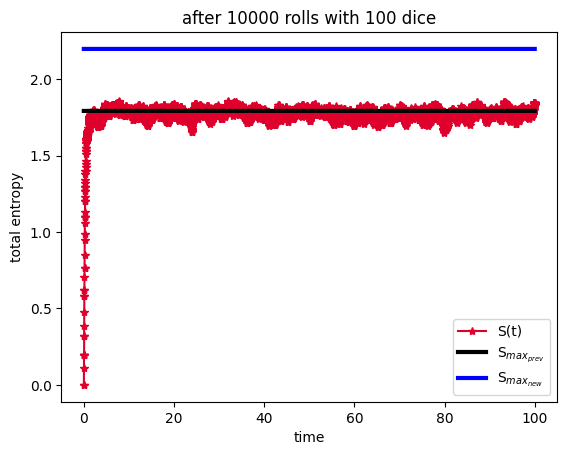

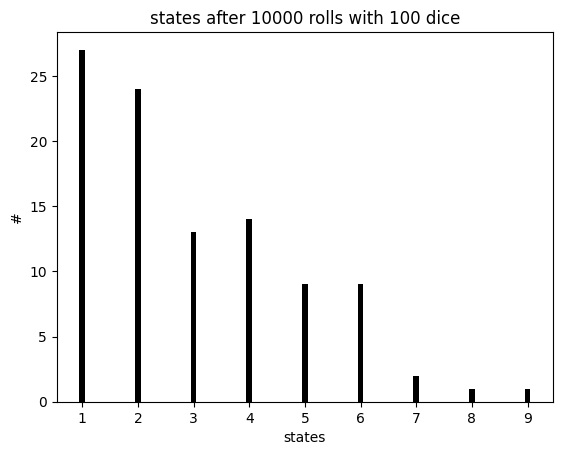

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the dice system and calculate entropy at each step
def random_machine(N, rolls):
    # Initialize all dice to show the same number (3)
    dice = np.repeat(3, N)
    max_die = 3
    
    # Array to store entropy at each time step
    entropies = np.empty(rolls)

    entropies[0] = 0

    for i in range(rolls):
        # Randomly select a die and roll it
        choice = np.random.randint(0, N)
        old_val = dice[choice]
        dice[choice] = np.random.randint(1, 7)

        d = dice[choice] - old_val

        if d > 0:
            k = 0
            while k < d:
                pick = np.random.randint(0, N)
                if dice[pick] != 1:
                    dice[pick] = dice[pick] - 1
                    if dice[pick] > max_die:
                        max_die = dice[pick]
                    k = k + 1

        if d < 0:
            k = 0
            while k < np.abs(d):
                pick = np.random.randint(0, N)
                dice[pick] = dice[pick] + 1
                k = k + 1
        
        # Count occurrences of each face (1 to 6)
        counts = np.bincount(dice, minlength=7)[1:]  # ignore index 0
        probabilities = counts / N  # calculate probabilities for each face
        
        # Calculate entropy S using the formula
        non_zero_probs = probabilities[probabilities > 0]  # avoid log(0)
        entropy = -np.sum(non_zero_probs * np.log(non_zero_probs))
        
        # Store the entropy
        if i != rolls - 1:
            entropies[i + 1] = entropy

    # Array to store times of rolls
    time_steps = np.linspace(0, rolls/100, rolls)

    # Array to plot max entropy
    
    max_entropy1 = np.repeat(np.log(6), rolls)
    max_entropy2 = np.repeat(np.log(max_die), rolls)

    # Plot Entropy against time
    fig, ax = plt.subplots()
    ax.plot(time_steps, entropies, color = '#DF002B', marker = '*', label = 'S(t)')
    ax.plot(time_steps, max_entropy1, color = 'k', label = 'S$_{max_{prev}}$', linewidth = '3')
    ax.plot(time_steps, max_entropy2, color = 'blue', label = 'S$_{max_{new}}$', linewidth = '3')
    ax.set_xlabel('time')
    ax.set_ylabel('total entropy')
    ax.set_title(f'after {rolls} rolls with {N} dice')
    ax.legend(loc = 'lower right')

    # Possible Rolls
    
    roll_plot = np.arange(1, np.max(dice)+1)

    fig2, ax2 = plt.subplots()
    ax2.bar(roll_plot, counts, width = 0.1, color = 'k')
    ax2.set_xlabel('states')
    ax2.set_ylabel('#')
    ax2.set_title(f'states after {rolls} rolls with {N} dice')

N = 100   # Number of dice
rolls = 10000  # Number of time steps

random_machine(N, rolls)

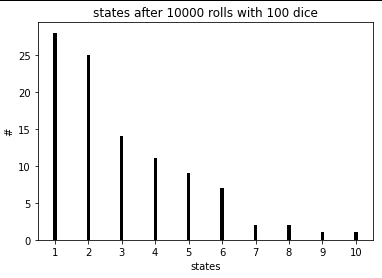
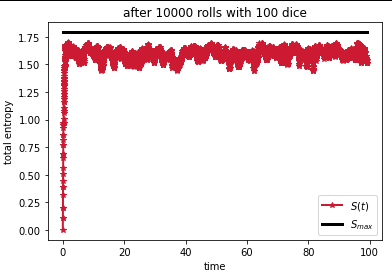

- What do you observe now?<br> 
- Does the entropy of the system reach its theoretical maximum?<br>
- What do you think which distribution best describes the histogram of the states now?<br>

The entropy of the system increases to high entropy and stays around largely the same entropy. This implies that the system tends towards maximum entropy.

The entropy of the system does reach the maximum of the case where the states of the die are restricted to 1-6. This makes sense because with a greater number of states, the entropy can increase. The entropy does not reach its new theoretical maximum because each roll brings the number of states on a particular die back down below 6, thus limiting the entropy from reaching its theoretical maximum.

The histogram most closely follows a boltzmann distribution because it does not go below zero and is skewed to the right.